In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pysta
import stcl

import os

%load_ext autoreload
%autoreload 2

In [2]:
def remove_box():
    # remove top & right box
    # https://stackoverflow.com/a/28720127
    ax=plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
# ANOVA
# https://www.pythonfordatascience.org/anova-python/
from scipy import stats
def do_anova(df, col, key='contrast', key_values=[50, 80, 100]):
    return stats.f_oneway(df[col][df[key] == key_values[0]],
                           df[col][df[key] == key_values[1]],
                           df[col][df[key] == key_values[2]])

## run for all cells (OFF LINE)

datasets: Gaussian stim with diffent contrasts

run
```
python3 stcl_batch.py --contrast 50
python3 stcl_batch.py --contrast 80
python3 stcl_batch.py --contrast 100
```

## read clustering results

In [3]:
contrasts = [50, 80, 100]
tap = 8 # -700 ms ~ 0
cluster_dim = 2

dfs = []
for contrast in contrasts:

    folder_name = "results/gaussian_stim_contrast{}_tap{}_cluster_dim{}".format(contrast, tap, cluster_dim)
    filename = os.path.join(folder_name, "clusters.csv")

    clusters = pd.read_csv(filename)
    # weights
    # weights.head()

    clusters['contrast'] = contrast
    clusters["max_weight"] = np.maximum(clusters["weight1"], clusters["weight2"])
    
    
    dfs.append(clusters)

    
clusters_all = pd.concat(dfs)
# # combine number of samples
# clusters = clusters.merge(num_samples_df, on="channel_name") #, how="outer")

# # combine largest eigen values
# clusters = clusters.merge(largest_eigen_values_df, on="channel_name", how="outer")


# filename = os.path.join(folder_name, "clusters_combined.csv")
# clusters.to_csv(filename, index=None)

Text(0.5, 1.0, 'ANOVA p=0.00')

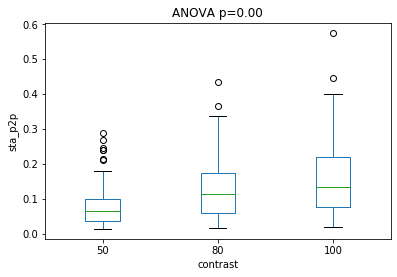

In [4]:
col = 'sta_p2p'
clusters_all.boxplot(col, by='contrast', grid=False)
plt.title(None)
plt.ylabel(col)
# remove_box()

val, p = do_anova(clusters_all, col)
plt.suptitle('')
plt.title ('ANOVA p={:.2f}'.format(p))

# plt.savefig(os.path.join(data_path, 'figure', 'sta_p2p_vs_contrast.png'), dpi=150)

In [5]:
# print(len(clusters_all)/3)
# clusters_all['cell_type'].value_counts()

In [6]:
idx_on = clusters_all['cell_type']=='ON'
idx_off = clusters_all['cell_type']=='OFF'
idx_on_off = clusters_all['cell_type']== 'ON-OFF'



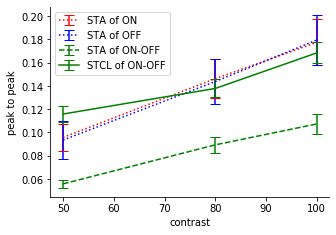

In [7]:
plt.figure(figsize=(5,3.5))

key = 'contrast'
col = 'sta_p2p'

colors = ['r','b','g']
linestyles = [':', ':', '--']
for i, idx in enumerate([idx_on, idx_off, idx_on_off]):
    plt.errorbar([50, 80, 100], clusters_all.loc[idx,:].groupby(key)[col].mean(), clusters_all.loc[idx,:].groupby(key)[col].sem(),
                 linestyle=linestyles[i], color=colors[i], capsize=5)

# all centers 
# combine two centers
centers_all = pd.concat([clusters_all[['channel_name', 'cell_type', 'contrast', 'center0_p2p']].rename(columns={'center0_p2p': 'center_p2p'}),
                        clusters_all[['channel_name', 'cell_type', 'contrast', 'center1_p2p']].rename(columns={'center1_p2p': 'center_p2p'})])

idx = centers_all['cell_type'] == 'ON-OFF'

col = 'center_p2p'
plt.errorbar([50, 80, 100], centers_all.loc[idx,:].groupby(key)[col].mean(), centers_all.loc[idx,:].groupby(key)[col].sem(),
             color=colors[i], capsize=5)

# col = 'center0_p2p'
# plt.errorbar([50, 80, 100], clusters_all.loc[idx,:].groupby(key)[col].mean(), clusters_all.loc[idx,:].groupby(key)[col].sem(),
#              color=colors[i], capsize=5)

# col = 'center1_p2p'
# plt.errorbar([50, 80, 100], clusters_all.loc[idx,:].groupby(key)[col].mean(), clusters_all.loc[idx,:].groupby(key)[col].sem(),
#              color=colors[i], capsize=5)
    
plt.xlabel('contrast')
plt.ylabel(col)
plt.legend(['STA of ON ', 'STA of OFF', 'STA of ON-OFF', 'STCL of ON-OFF'])


# print(do_anova(clusters_all.loc[idx_on,:], col))
# print(do_anova(clusters_all.loc[idx_off,:], col))
# print(do_anova(clusters_all.loc[idx_on_off,:], col))
remove_box()

plt.ylabel('peak to peak')

plt.savefig('figure/contrast_vs_peak_diff.png')
plt.savefig('figure/contrast_vs_peak_diff.pdf')

## statistical test for each contrast

ON or OFF vs. ON-OFF

In [20]:
idx_on_or_off = np.logical_or(idx_on, idx_off)
np.sum(idx_on), np.sum(idx_off), np.sum(idx_on_or_off)
clusters_on_or_off = clusters_all.loc[idx_on_or_off]
clusters_on_or_off.head()

,channel_name,num_spikes,cell_type,sta_p2p,sta_std,eig1,eig2,eig3,converged,center0_p2p,center0_std,center1_p2p,center1_std,weight1,weight2,inner_product,contrast,max_weight
1,ch_13a,23449,ON,0.015210,0.002606,0.096227,0.096015,0.095343,True,0.070105,0.010932,0.071305,0.011778,0.509035,0.490965,-0.058905,50,0.509035
2,ch_13b,8303,ON,0.027597,0.003773,0.107500,0.106082,0.105627,True,0.071176,0.012111,0.088342,0.012329,0.502551,0.497449,-0.061810,50,0.502551
3,ch_14a,15924,ON,0.015764,0.002658,0.095412,0.094184,0.093359,True,0.065309,0.011196,0.067404,0.011326,0.497300,0.502700,-0.057665,50,0.502700
5,ch_14c,3866,OFF,0.029373,0.004820,0.126926,0.126190,0.125348,True,0.093517,0.013733,0.084839,0.013304,0.485738,0.514262,-0.069757,50,0.514262
6,ch_16a,18372,ON,0.016734,0.002264,0.091721,0.091266,0.090291,True,0.073861,0.010783,0.070855,0.011217,0.506555,0.493445,-0.056643,50,0.506555


0.095080948125564 0.009424104816820654  vs  0.13798588417875882 0.006792451276445197
p= nan
0.14554212709945083 0.012998198100019936  vs  0.17573721419846547 0.007654605720267443
p= 0.04797541171319076
0.1780799361508884 0.0151762301212536  vs  0.2224956928916773 0.011349799773927275
p= 0.02061012151311318


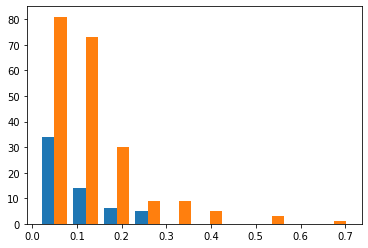

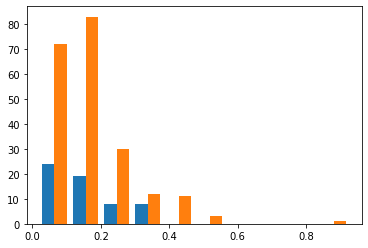

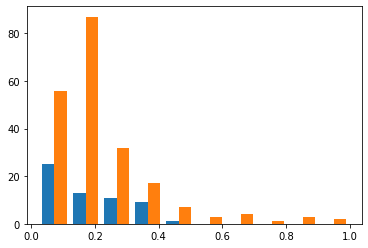

In [56]:
ps = list()
for contrast in contrasts:
    data1 = clusters_on_or_off.loc[clusters_on_or_off['contrast']==contrast,'sta_p2p']
    data2 = centers_all.loc[centers_all['contrast']==contrast, 'center_p2p']

    plt.figure()
    plt.hist([data1, data2])

    print(data1.mean(), data1.sem(), ' vs ', data2.mean(), data2.sem())
    tmp, p = stats.ttest_ind(data1.to_list(), data2.to_list(), equal_var=False)
    #tmp, p = stats.ttest_ind_from_stats(data1.mean(), data1.std(), len(data1), data2.mean(), data2.std(), len(data2), equal_var=False)
    print ('p=', p)
    ps.append(p)

In [50]:
data1.to_list()

[0.038107985677287286,
 0.08192728879898943,
 0.024114607052421026,
 0.06313080227619161,
 0.023494438129761097,
 0.03968665728471588,
 0.037126994182982265,
 0.06065177066624955,
 0.07918971539429083,
 0.20666782536873024,
 0.2416565375812187,
 0.08154483045308075,
 0.15963983391675307,
 0.09969610681961427,
 0.3529027287878658,
 0.07094126901432185,
 0.21137575716090803,
 0.07485432748818455,
 0.16120798774695433,
 0.09809938548140727,
 0.07678445146936291,
 0.22211176777071667,
 0.15663822123833654,
 0.2297016080114148,
 0.1476657829176204,
 0.053339955763703366,
 0.3679613822271014,
 0.22491714926329104,
 0.15940776945776713,
 0.3746439460909328,
 0.27308541804465586,
 0.3625197669327892,
 0.44632738389653936,
 0.08337243643565534,
 0.14367311893246593,
 0.20998458040986545,
 0.11635923078819282,
 0.3222373318398591,
 0.0937405244842417,
 0.08903707950267009,
 0.06333185541180353,
 0.2846748673180467,
 0.3994550518907895,
 0.24177739503495665,
 0.16800908386564295,
 0.0807566739205

In [42]:
data2.mean(), data2.sem()

(0.13798588417875882, 0.006792451276445197)

In [30]:
data1['sta_p2p']
# data2['center_p2p']

1      0.015210
2      0.027597
3      0.015764
5      0.029373
6      0.016734
7      0.027752
9      0.027688
10     0.019887
11     0.040265
13     0.032370
14     0.268989
16     0.037941
17     0.059091
18     0.016864
19     0.238594
22     0.029036
23     0.068864
24     0.054909
25     0.069023
27     0.025262
28     0.065270
30     0.120968
34     0.077060
36     0.136638
38     0.106498
39     0.028924
41     0.246357
44     0.105499
46     0.082743
47     0.211096
49     0.171832
51     0.238775
52     0.142002
53     0.028950
54     0.096627
55     0.153121
57     0.073225
58     0.149827
60     0.098464
61     0.029237
63     0.046579
64     0.074333
68     0.214827
69     0.148655
71     0.160451
73     0.052642
74     0.129651
80     0.069923
83     0.036184
87     0.288377
88     0.036700
91     0.094598
92     0.152979
93     0.072049
95     0.044517
97     0.112608
101    0.157858
102    0.052656
105    0.179860
Name: sta_p2p, dtype: float64

In [ ]:
clusters_all.loc[idx,:].groupby(key)[col]

In [ ]:
key = 'contrast'
col = 'center0_p2p'

colors = ['r','b','g']
for i, idx in enumerate([idx_on, idx_off, idx_on_off]):
    plt.errorbar([50, 80, 100], clusters_all.loc[idx,:].groupby(key)[col].mean(), clusters_all.loc[idx,:].groupby(key)[col].sem(),
                 color=colors[i], capsize=5)

plt.xlabel('contrast')
plt.ylabel(col)
plt.legend(['ON', 'OFF', 'ON-OFF'])


print(do_anova(clusters_all.loc[idx_on,:], col))
print(do_anova(clusters_all.loc[idx_off,:], col))
print(do_anova(clusters_all.loc[idx_on_off,:], col))
remove_box()

In [ ]:
key = 'contrast'
col = 'center1_p2p'

colors = ['r','b','g']
for i, idx in enumerate([idx_on, idx_off, idx_on_off]):
    plt.errorbar([50, 80, 100], clusters_all.loc[idx,:].groupby(key)[col].mean(), clusters_all.loc[idx,:].groupby(key)[col].sem(),
                 color=colors[i], capsize=5)

plt.xlabel('contrast')
plt.ylabel(col)
plt.legend(['ON', 'OFF', 'ON-OFF'])


print(do_anova(clusters_all.loc[idx_on,:], col))
print(do_anova(clusters_all.loc[idx_off,:], col))
print(do_anova(clusters_all.loc[idx_on_off,:], col))
remove_box()

In [ ]:
for group, data in clusters_all.groupby('cell_type', sort=False):
    print(group)
    print(data.mean())

In [ ]:
clusters.plot.scatter("PSNR", "PSNR1")
plt.plot([5,25], [5,25], 'k--')
clusters.plot.scatter("PSNR", "PSNR2")
plt.plot([5,25], [5,25], 'k--')

In [ ]:
idx_PSNR1_increased = np.where(clusters["PSNR"] < clusters["PSNR1"])
idx_PSNR2_increased = np.where(clusters["PSNR"] < clusters["PSNR2"])

clusters.iloc[np.union1d(idx_PSNR1_increased, idx_PSNR2_increased)]

In [ ]:
clusters.iloc[np.intersect1d(idx_PSNR1_increased, idx_PSNR2_increased)]

In [ ]:
clusters_with_negative_inner_product = clusters.loc[clusters["inner_product"]<0,:]

print(len(clusters_with_negative_inner_product), len(clusters))
clusters_with_negative_inner_product.sort_values('inner_product').head(20)

In [ ]:
#plt.plot(clusters_with_negative_inner_product[])
clusters_with_negative_inner_product.plot.scatter("PSNR", "PSNR1")
plt.plot([5,25], [5,25], 'k--')
clusters_with_negative_inner_product.plot.scatter("PSNR", "PSNR2")
plt.plot([5,25], [5,25], 'k--')

In [ ]:
bins = np.linspace(0.5, 1, 20)
plt.hist(clusters["max_weight"], bins=bins)
#clusters["max_weight"].hist()
#plt.
plt.savefig("{}/max_weight_hist.png".format(folder_name))

In [ ]:
# clusters["inner_product"].hist()
# plt.savefig("{}/inner_product_hist.png".format(folder_name))

### histogram of  innerproduct for each cell type

In [ ]:
## Combine with cell type info
# cell_type = pd.DataFrame({"channel_name": info["channel_names"],
#                           "cell_type":   info["cell_types"]})
# cell_type

# clusters = clusters.merge(cell_type, on="channel_name", how="outer")

# filename = os.path.join(folder_name, "clusters_combined.csv")
# clusters.to_csv(filename, index=None)

In [ ]:
# clusters
#info["cell_types"]
#clusters.groupby("cell_type").hist()
clusters["inner_product"].hist(by=clusters["cell_type"])

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(221)
# pysta.plot_histogram_by_cell_type(clusters, "num_spikes")
pysta.plot_hist_by_group(clusters, "num_spikes", 'cell_type')
plt.subplot(222)
# pysta.plot_histogram_by_cell_type(clusters, "eig1")
pysta.plot_hist_by_group(clusters, "eig1", 'cell_type')
plt.subplot(223)
# pysta.plot_histogram_by_cell_type(clusters, "PSNR")
pysta.plot_hist_by_group(clusters, "PSNR", 'cell_type')
plt.subplot(224)
pysta.plot_hist_by_group(clusters, "inner_product", 'cell_type')
# pysta.plot_histogram_by_cell_type(clusters, "inner_product")
# pysta.plot_histogram_by_cell_type(clusters, "max_weight")

plt.savefig("figure/{}_tap{}_cluster_dim{}_stat.pdf".format(contrast, tap, cluster_dim))
plt.savefig("figure/{}_tap{}_cluster_dim{}_stat.png".format(contrast, tap, cluster_dim))

## Focus on data with enough samples

In [ ]:
clusters.num_spikes.hist()

In [ ]:
idx_enough_samples = clusters["num_spikes"]>512*4
clusters_with_enough_samples = clusters.loc[idx_enough_samples]

print(len(clusters_with_enough_samples))

print(clusters_with_enough_samples["cell_type"].value_counts())

clusters_with_enough_samples["cell_type"].hist()

In [ ]:
idx_unknown = clusters_with_enough_samples["cell_type"]=="unknown"

clusters_with_enough_samples.loc[idx_unknown]

# clusters_with_enough_samples.loc[idx_unknown].to_csv("{}_tap{}_cluster_with_enough_samples_dim{}_unknown.csv".format(dataset_name, tap, dim))

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(221)
pysta.plot_hist_by_group(clusters_with_enough_samples, "num_spikes", 'cell_type')
plt.subplot(222)
pysta.plot_hist_by_group(clusters_with_enough_samples, "eig1", 'cell_type')
plt.subplot(223)
pysta.plot_hist_by_group(clusters_with_enough_samples, "PSNR", 'cell_type')
plt.subplot(224)
pysta.plot_hist_by_group(clusters_with_enough_samples, "inner_product", 'cell_type')

plt.savefig("figure/{}_tap{}_cluster_dim{}_enough_samples_stat.pdf".format(contrast, tap, cluster_dim))
plt.savefig("figure/{}_tap{}_cluster_dim{}_enough_samples_stat.png".format(contrast, tap, cluster_dim))

In [ ]:
# plot inner product only
pysta.plot_hist_by_group(clusters_with_enough_samples, "inner_product", 'cell_type')
# pysta.plot_histogram_by_cell_type(clusters_with_enough_samples, "inner_product")
# plt.savefig("figure/{}_tap{}_cluster_dim{}_inner_product_hist.png".format(dataset_name, tap, cluster_dim))
# plt.savefig("figure/{}_tap{}_cluster_dim{}_inner_product_hist.pdf".format(dataset_name, tap, cluster_dim))

## paired t-test

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

In [ ]:
# from scipy import stats

In [ ]:
# stats.ttest_rel(clusters_dim2["max_weight"], clusters_dim2["max_weight"])

In [ ]:
# stats.ttest_rel(clusters_dim2["inner_product"], clusters_dim2["inner_product"])